In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
glob.glob('*.csv')

['New_books.csv']

## Load data

In [3]:
cleaned_books_df = pd.read_csv('New_books.csv')
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [4]:
cleaned_books_df.describe()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
count,8287,7320,4092,8274,6509,8287
unique,1192,403,1989,8031,4949,8287
top,London,1897,Macmillan & Co.,Poems,William Shakespeare,http://www.flickr.com/photos/britishlibrary/ta...
freq,4219,174,85,10,48,1


## 1. Get the top 5 publishers and their published number.
To understanding Market Dynamics, identifying the top publishers helps understand the publishing market's dynamics during a specific period. It can indicate which publishers were dominant and how the publishing landscape might have been shaped by their activities.

In [5]:
cleaned_books_df['Publisher'].value_counts()

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
                     ..
F. Murray             1
J. Davidson & Co.     1
Punch Office          1
J. Cooke, etc.        1
W. Abbatt             1
Name: count, Length: 1989, dtype: int64

In [6]:
n = 5
publisher_list = cleaned_books_df['Publisher'].value_counts()[:n]
publisher_list

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
Name: count, dtype: int64

In [7]:
publisher_list.index, publisher_list.to_list()

(Index(['Macmillan & Co.', 'London', 'Privately printed', 'Longmans & Co.',
        'Hurst & Blackett'],
       dtype='object', name='Publisher'),
 [85, 69, 53, 52, 51])

<BarContainer object of 5 artists>

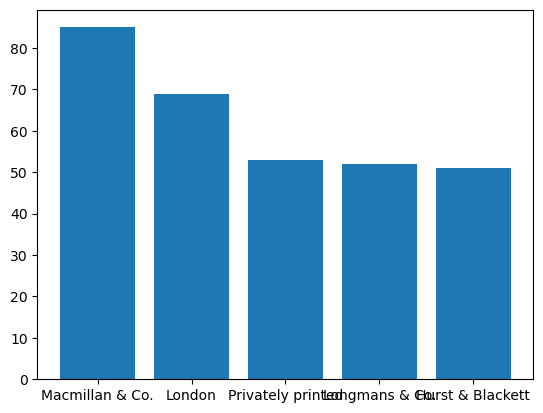

In [8]:
plt.bar(publisher_list.index,publisher_list.to_list())

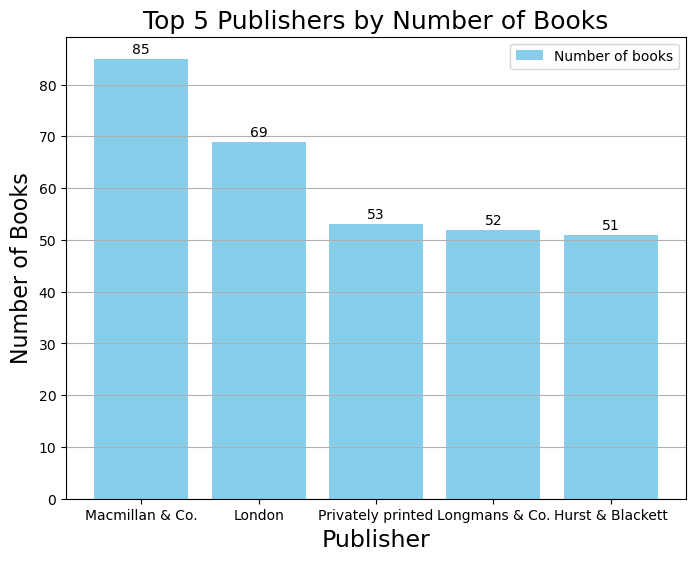

In [13]:
# Creating a bar graph 
plt.figure(figsize=(8,6))

#load your data 
#Your code:
df = pd.read_csv('New_books.csv')

# Count how many books each publisher has
top_publishers = df['Publisher'].value_counts().head(5)

bars = plt.bar(top_publishers.index, top_publishers.values, label='Number of books', color='skyblue')

# Annotate each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.legend()
plt.title('Top 5 Publishers by Number of Books', fontsize=18)
plt.xlabel('Publisher', fontsize=17)
plt.ylabel('Number of Books', fontsize=16)
plt.grid(axis='y')
plt.show()

## Practice 1
### 1.1 Identify the top five publishers with the greatest number of books published. 
### 1.2 Ascertain the year in which each of these publishers achieved their highest sales, along with the total number of books they published in that particular year.


In [ ]:
publisher_list

In [ ]:
# Selecting the data for the chosen publisher "Macmillan & Co."
cleaned_books_df[cleaned_books_df['Publisher'] == 'Macmillan & Co.']

Top 5 Publishers:
 Publisher
Macmillan & Co.     85
London              54
Longmans & Co.      52
Hurst & Blackett    50
John Murray         49
Name: count, dtype: int64

Year of highest publication per top publisher:
             Publisher    Year  Books_Published
162   Macmillan & Co.  1896.0               16
127    Longmans & Co.  1889.0                6
3    Hurst & Blackett  1856.0                3
95             London  1866.0                3
41        John Murray  1826.0                3


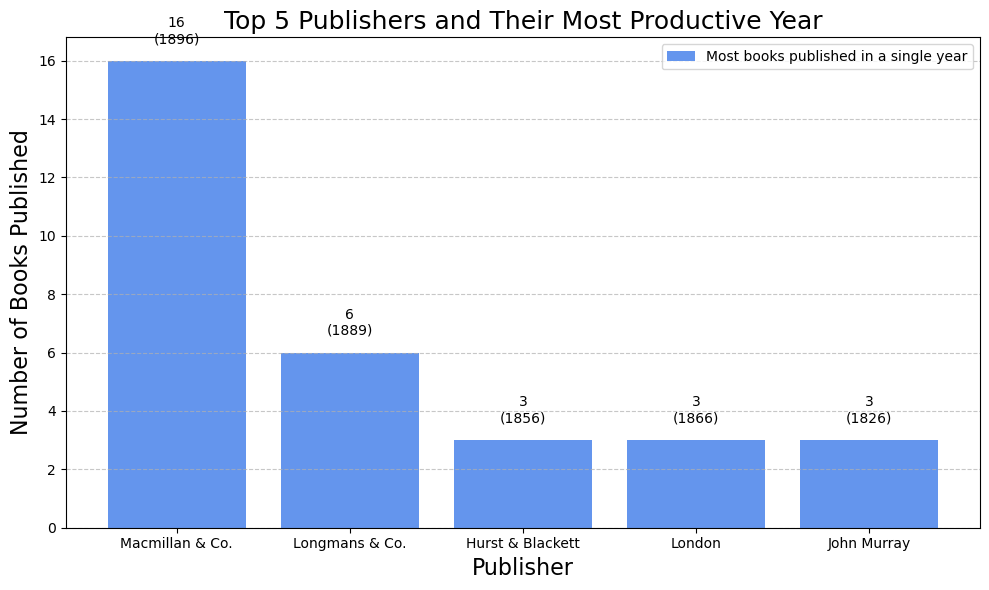

In [16]:
# Load your CSV file
books_df = pd.read_csv('New_books.csv')

# Clean missing publisher or publication date values
cleaned_books_df = books_df.dropna(subset=['Publisher', 'Date of Publication']).copy()

# Extract 4-digit year from "Date of Publication" (handles things like "1899", "c1899", "1985.", etc.)
cleaned_books_df['Year'] = (
    cleaned_books_df['Date of Publication']
    .astype(str)
    .str.extract(r'(\d{4})')     # regex finds 4-digit numbers
    .astype(float)
)

# Identify the top five publishers with the greatest number of books published
top_publishers = cleaned_books_df['Publisher'].value_counts().head(5)
publisher_list = top_publishers.index.tolist()
print("Top 5 Publishers:\n", top_publishers)

# Count how many books each publisher published each year
pub_year_counts = (
    cleaned_books_df[cleaned_books_df['Publisher'].isin(publisher_list)]
    .groupby(['Publisher', 'Year'])
    .size()
    .reset_index(name='Books_Published')
)

# Get the year each publisher published the most books
max_year_per_pub = (
    pub_year_counts.loc[pub_year_counts.groupby('Publisher')['Books_Published'].idxmax()]
    .sort_values(by='Books_Published', ascending=False)
)

print("\nYear of highest publication per top publisher:\n", max_year_per_pub)

# Create a bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(max_year_per_pub['Publisher'], max_year_per_pub['Books_Published'],
               color='cornflowerblue', label='Most books published in a single year')

# Annotate each bar with number and year
for bar, year in zip(bars, max_year_per_pub['Year']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f"{int(yval)}\n({int(year)})", ha='center', va='bottom', fontsize=10)

plt.legend()
plt.title('Top 5 Publishers and Their Most Productive Year', fontsize=18)
plt.xlabel('Publisher', fontsize=16)
plt.ylabel('Number of Books Published', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2. Get the 5 most published place
Reason: For contemporary publishers, marketers, and authors, understanding historical publishing centers can provide insights into established markets and potential opportunities for new ventures or expansions.

In [17]:
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL,Year
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...,1879.0
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...,1868.0
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...,1869.0
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...,1851.0
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...,1857.0


In [18]:
cleaned_books_df.describe()

,Year
count,3577.000000
mean,1858.251048
std,47.188857
min,1510.000000
25%,1839.000000
50%,1877.000000
75%,1891.000000
max,1915.000000


In [19]:
#create publish_place_data
def get_publish_place_data(n,df):
    #n: Number of target searches
    #df: input dataframe
    # Your code:
    place_counts = df['Place of Publication'].value_counts().head(n)
    
    # Convert to dictionary format {place: count}
    dic = place_counts.to_dict()
    
    return dic
    
get_publish_place_data(5,cleaned_books_df)

{'London': 2324,
 'Edinburgh': 136,
 'New York': 102,
 'Philadelphia': 46,
 'Boston': 34}

['London', 'Edinburgh', 'New York', 'Philadelphia', 'Boston']
[2324, 136, 102, 46, 34]


<Figure size 800x800 with 0 Axes>

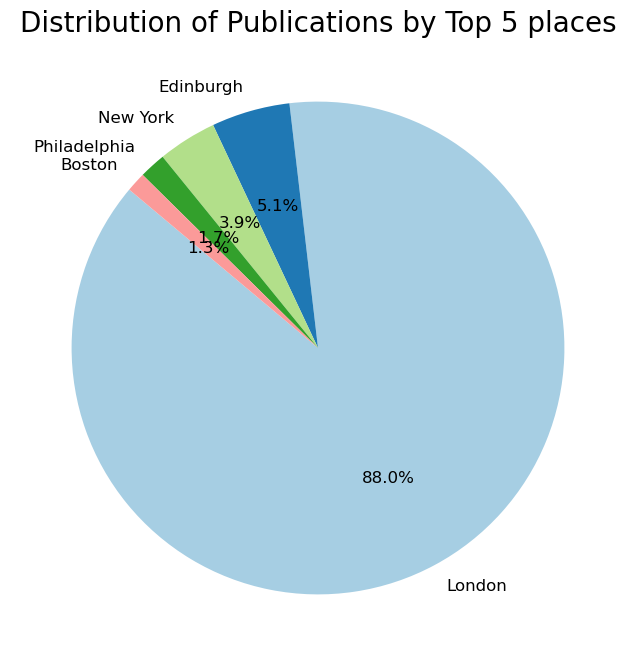

In [20]:
# Pie Chart Analysis: 

# Sample data provided earlier (assuming the same structure as the actual dataset)
place_of_data = get_publish_place_data(5,cleaned_books_df)

# Extracting data for pie chart
places = list(place_of_data.keys())
publications = [place_of_data[place] for place in places]
print(places)
print(publications)


# Creating a pie chart
plt.figure(figsize = (8,8))
# Your Pie chart code:
plt.figure(figsize=(8,8))
plt.pie(publications, labels=places, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired.colors, textprops={'fontsize': 12})

plt.title('Distribution of Publications by Top 5 places', fontsize =20)
plt.show()



### 3.1 Demo for  `.groupby`  function

In [21]:
# Sample DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'B'],
                   'Values': [10, 20, 30, 40]})

df

,Category,Values
0,A,10
1,B,20
2,A,30
3,B,40


In [22]:
# Grouping by 'Category' and calculating the size of each group
grouped = df.groupby('Category').size()

print(grouped)

Category
A    2
B    2
dtype: int64


In [23]:
# Grouping by 'Category' and calculating the mean of each group
grouped = df.groupby('Category').sum()

print(grouped)

          Values
Category        
A             40
B             60


## 3. Show the yearly trend in the number of publications

### 3.2 Use `.groupby` on Books data

In [24]:
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL,Year
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...,1879.0
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...,1868.0
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...,1869.0
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...,1851.0
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...,1857.0


In [25]:
cleaned_books_df['Date of Publication']

0       1879 
1        1868
2        1869
3        1851
4        1857
        ...  
8279     1898
8280     1811
8281     1867
8283     1831
8285     1834
Name: Date of Publication, Length: 3579, dtype: object

In [26]:
yearly_publication_counts = cleaned_books_df.groupby('Date of Publication').size()
yearly_publication_counts

Date of Publication
112. G. & W. B. Whittaker    1
1510?]                       1
1540                         1
1592                         1
1602                         1
                            ..
1899]                        1
1900]                        1
1915                         1
MDCCCC.                      1
c.1825]                      1
Length: 303, dtype: int64

In [27]:
for i in yearly_publication_counts.index:
    print(i,type(i))

112. G. & W. B. Whittaker <class 'str'>
1510?] <class 'str'>
1540 <class 'str'>
1592 <class 'str'>
1602 <class 'str'>
1607 <class 'str'>
1625 <class 'str'>
1628 <class 'str'>
1633 <class 'str'>
1635 <class 'str'>
1637 <class 'str'>
1638 <class 'str'>
1639 <class 'str'>
1640 <class 'str'>
1648 <class 'str'>
1653 <class 'str'>
1654 <class 'str'>
1654  <class 'str'>
1657 <class 'str'>
1658 <class 'str'>
1660 <class 'str'>
1661 <class 'str'>
1663 <class 'str'>
1670 <class 'str'>
1671 <class 'str'>
1673 <class 'str'>
1674 <class 'str'>
1675 <class 'str'>
1677 <class 'str'>
1678 <class 'str'>
1679 <class 'str'>
1681 <class 'str'>
1682 <class 'str'>
1683 <class 'str'>
1684 <class 'str'>
1685 <class 'str'>
1686 <class 'str'>
1687 <class 'str'>
1688 <class 'str'>
1690 <class 'str'>
1691 <class 'str'>
1693 <class 'str'>
1694 <class 'str'>
1694  <class 'str'>
1695 <class 'str'>
1696 <class 'str'>
1697 <class 'str'>
1699 <class 'str'>
1701 <class 'str'>
1703 <class 'str'>
1705 <class 'str'>
1707 <

In [33]:
import re
def clean_year(date_str):
    
    if pd.isna(date_str):
        return np.nan

    text = str(date_str)

    # Find all 4-digit numbers (e.g., 1860, 1897, 1903)
    years = re.findall(r'\d{4}', text)
    if not years:
        return np.nan

    # Take the first valid year found
    year = int(years[0])

    # Optional sanity check
    if 1450 <= year <= 2025:
        return year
    else:
        return np.nan

In [34]:
for i in yearly_publication_counts.index:
    print(i,clean_year(i))

112. G. & W. B. Whittaker nan
1510?] 1510
1540 1540
1592 1592
1602 1602
1607 1607
1625 1625
1628 1628
1633 1633
1635 1635
1637 1637
1638 1638
1639 1639
1640 1640
1648 1648
1653 1653
1654 1654
1654  1654
1657 1657
1658 1658
1660 1660
1661 1661
1663 1663
1670 1670
1671 1671
1673 1673
1674 1674
1675 1675
1677 1677
1678 1678
1679 1679
1681 1681
1682 1682
1683 1683
1684 1684
1685 1685
1686 1686
1687 1687
1688 1688
1690 1690
1691 1691
1693 1693
1694 1694
1694  1694
1695 1695
1696 1696
1697 1697
1699 1699
1701 1701
1703 1703
1705 1705
1707 1707
1707  1707
1709 1709
1710 1710
1713 1713
1716 1716
1717 1717
1718 1718
1719 1719
1720 1720
1721 1721
1722 1722
1724 1724
1725 1725
1728 1728
1729 1729
1731 1731
1732 1732
1733 1733
1734 1734
1735 1735
1737 1737
1738 1738
1739 1739
1741 1741
1742 1742
1743 1743
1744 1744
1746 1746
1747 1747
1749 1749
1750 1750
1751 1751
1752 1752
1753 1753
1755 1755
1756 1756
1757 1757
1758 1758
1759 1759
1760 1760
1761 1761
1762 1762
1763 1763
1764 1764
1765 1765
1766 

In [35]:
def clean_year(year):
    
    if year == 'nan':
        return '0'
    if year[0]!='1':
        year=year[year.find('1'):]
    if ' ' in year:
        year=year[:year.find(' ')]
    if '/' in year:
        year=year[:year.find('/')]
    if '?' in year:
        year = year[:year.find('?')]
    if ']' in year:
        year = year[:year.find(']')]
    if '.' in year:
        year = year[:year.find('.')]

    if year.isdigit():
        year = int(year)
    else:
        year = 30

    return year

cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].astype(str)
cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].apply(clean_year)
cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].astype(int)
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL,Year
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...,1879.0
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...,1868.0
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...,1869.0
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...,1851.0
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...,1857.0


### Get line plot 

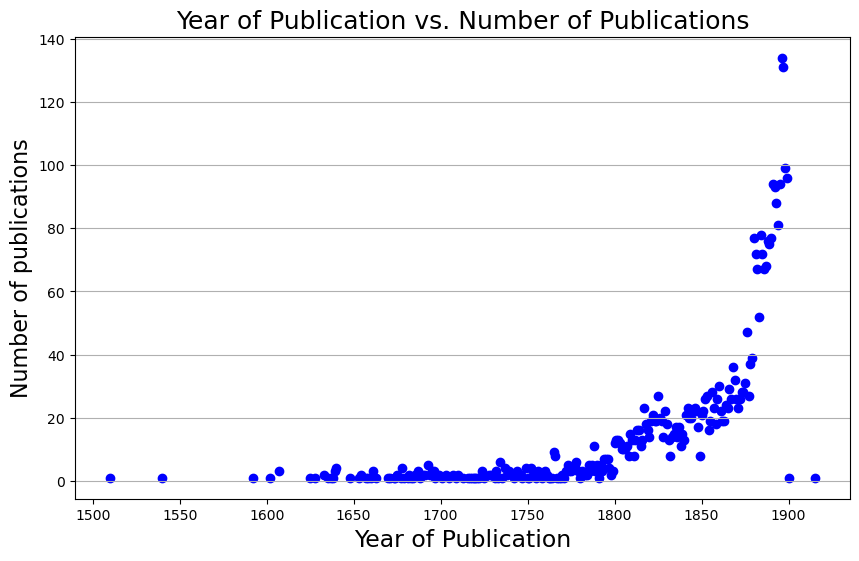

In [36]:
# Scatter Plot Analysis: Year of Publication vs. Number of Publications

# Grouping the data by 'Date of Publication' to count the number of publications each year
testdata = cleaned_books_df[cleaned_books_df['Date of Publication']>1000]
yearly_Publication_count = testdata.groupby('Date of Publication').size()

# Sorting the data by year (index of the grouped data)
sorted_years = yearly_Publication_count.sort_index()

# Creating a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(sorted_years.index,sorted_years,color='blue')


plt.title('Year of Publication vs. Number of Publications',fontsize=18)
plt.xlabel('Year of Publication',fontsize=17)
plt.ylabel('Number of publications',fontsize=16)
plt.grid(axis='y')

plt.show()

# A line graph to show the yearly trend in the number of publications.

In [44]:
# Save to CSV
max_year_per_pub.to_csv('Practice1_Top5_Publishers_Most_Productive_Year.csv', index=False)
print("Practice 1 results saved to Practice1_Top5_Publishers_Most_Productive_Year.csv")

Practice 1 results saved to Practice1_Top5_Publishers_Most_Productive_Year.csv


## Practice 2
### Identify the top five publishers with their publicated books during 1800 - 1900. (line graph)


In [37]:
publish_list = cleaned_books_df['Publisher'].value_counts()[:5]
publish_list

Publisher
Macmillan & Co.     85
London              54
Longmans & Co.      52
Hurst & Blackett    50
John Murray         49
Name: count, dtype: int64

In [38]:
dfA = cleaned_books_df[cleaned_books_df['Publisher'] ==publish_list.index[0]]
filerdf = dfA[(dfA['Date of Publication']>=1800) & (dfA['Date of Publication']<=1900)]
yearly_counts = filerdf.groupby('Date of Publication').size()

yearly_counts.sort_index()

Date of Publication
1857     1
1859     1
1862     1
1864     1
1869     1
1870     1
1873     1
1874     2
1875     1
1876     1
1880     3
1881     1
1882     2
1883     1
1884     4
1885     2
1886     4
1887     2
1888     1
1889     2
1890     3
1891     1
1892     1
1893     5
1894     2
1895     8
1896    16
1897     6
1898     7
1899     3
dtype: int64

In [39]:
def filter_topX_publisher_in_1800_1900(n,df):
    #n: Number of target searches
    #df: input dataframe
    #Your code:
    if 'Year' not in df.columns:
        df['Year'] = df['Date of Publication'].apply(clean_year)  # use your clean_year() function

    # Filter for years 1800 - 1900
    df_filtered = df[(df['Year'] >= 1800) & (df['Year'] <= 1900)].copy()

    # Get top n publishers by total books in this period
    top_publishers = df_filtered['Publisher'].value_counts().head(n).index.tolist()

    dic_res = {}

    # For each top publisher, get yearly counts
    for pub in top_publishers:
        df_pub = df_filtered[df_filtered['Publisher'] == pub]
        yearly_counts = df_pub.groupby('Year').size().sort_index()
        dic_res[pub] = yearly_counts
    
    return dic_res

filter_topX_publisher_in_1800_1900(5,cleaned_books_df)

{'Macmillan & Co.': Year
 1857.0     1
 1859.0     1
 1862.0     1
 1864.0     1
 1869.0     1
 1870.0     1
 1873.0     1
 1874.0     2
 1875.0     1
 1876.0     1
 1880.0     3
 1881.0     1
 1882.0     2
 1883.0     1
 1884.0     4
 1885.0     2
 1886.0     4
 1887.0     2
 1888.0     1
 1889.0     2
 1890.0     3
 1891.0     1
 1892.0     1
 1893.0     5
 1894.0     2
 1895.0     8
 1896.0    16
 1897.0     6
 1898.0     7
 1899.0     3
 dtype: int64,
 'Longmans & Co.': Year
 1834.0    1
 1839.0    1
 1864.0    1
 1868.0    1
 1873.0    1
 1876.0    1
 1877.0    1
 1878.0    1
 1882.0    1
 1884.0    1
 1885.0    2
 1886.0    2
 1887.0    3
 1888.0    3
 1889.0    6
 1891.0    2
 1892.0    3
 1893.0    3
 1894.0    4
 1895.0    4
 1896.0    5
 1897.0    4
 1898.0    1
 dtype: int64,
 'Hurst & Blackett': Year
 1853.0    1
 1854.0    1
 1855.0    1
 1856.0    3
 1857.0    1
 1858.0    1
 1859.0    1
 1860.0    3
 1861.0    2
 1862.0    3
 1863.0    3
 1864.0    1
 1865.0    1
 1866.0

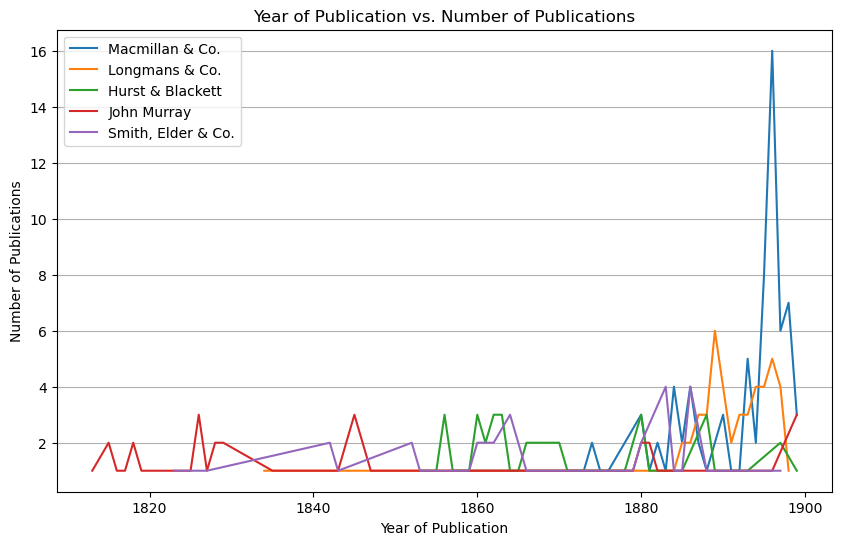

In [40]:
# Extracting publishers, publish years, and publish items
publisher_data_dic = filter_topX_publisher_in_1800_1900(5,cleaned_books_df)

# Creating a line graph
plt.figure(figsize=(10, 6))

for pub,years_data in publisher_data_dic.items():
#     print(pub,years_data)
    plt.plot(years_data.index, years_data, '-', label=pub)

# plt.plot(yearly_publication_counts.index, yearly_publication_counts, color='blue')
plt.title('Year of Publication vs. Number of Publications')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publications')
# plt.xticks([1500,1550,1600,1650,1700,1750,1800,1850,1900],
#            ['1890','1891','1892','1893','1894','1895','1896','1897','1898',],fontsize = 15)
plt.legend()
plt.grid(axis='y')
plt.show()

In [45]:
# Assuming place_of_data from Practice 2 exists
place_df = pd.DataFrame(list(place_of_data.items()), columns=['Place_of_Publication', 'Books_Published'])
place_df.to_csv('Practice2_Top5_Places_of_Publication.csv', index=False)
print("Practice 2 results saved to Practice2_Top5_Places_of_Publication.csv")


Practice 2 results saved to Practice2_Top5_Places_of_Publication.csv


### Compute the cumulative sum of Publications. (Please watch the tutorial)

In [42]:
# 1. Make sure clean_year() is defined
def clean_year(date_str):
    if pd.isna(date_str):
        return np.nan
    text = str(date_str)
    years = re.findall(r'\d{4}', text)
    if not years:
        return np.nan
    year = int(years[0])
    if 1450 <= year <= 2025:
        return year
    else:
        return np.nan

# 2. Make sure filter_topX_publisher_in_1800_1900() is defined
def filter_topX_publisher_in_1800_1900(n, df):
    if 'Year' not in df.columns:
        df['Year'] = df['Date of Publication'].apply(clean_year)
    df_filtered = df[(df['Year'] >= 1800) & (df['Year'] <= 1900)].copy()
    top_publishers = df_filtered['Publisher'].value_counts().head(n).index.tolist()
    dic_res = {}
    for pub in top_publishers:
        df_pub = df_filtered[df_filtered['Publisher'] == pub]
        yearly_counts = df_pub.groupby('Year').size().sort_index()
        dic_res[pub] = yearly_counts
    return dic_res

# 3. Get the top 5 publishers yearly counts
top5_publishers_yearly = filter_topX_publisher_in_1800_1900(5, cleaned_books_df)

# 4. Compute cumulative sum
cumulative_pub = {}
for pub, series in top5_publishers_yearly.items():
    cumulative_pub[pub] = series.cumsum()

# 5. Print cumulative sums (optional)
for pub, series in cumulative_pub.items():
    print(pub)
    print(series)

Macmillan & Co.
Year
1857.0     1
1859.0     2
1862.0     3
1864.0     4
1869.0     5
1870.0     6
1873.0     7
1874.0     9
1875.0    10
1876.0    11
1880.0    14
1881.0    15
1882.0    17
1883.0    18
1884.0    22
1885.0    24
1886.0    28
1887.0    30
1888.0    31
1889.0    33
1890.0    36
1891.0    37
1892.0    38
1893.0    43
1894.0    45
1895.0    53
1896.0    69
1897.0    75
1898.0    82
1899.0    85
dtype: int64
Longmans & Co.
Year
1834.0     1
1839.0     2
1864.0     3
1868.0     4
1873.0     5
1876.0     6
1877.0     7
1878.0     8
1882.0     9
1884.0    10
1885.0    12
1886.0    14
1887.0    17
1888.0    20
1889.0    26
1891.0    28
1892.0    31
1893.0    34
1894.0    38
1895.0    42
1896.0    47
1897.0    51
1898.0    52
dtype: int64
Hurst & Blackett
Year
1853.0     1
1854.0     2
1855.0     3
1856.0     6
1857.0     7
1858.0     8
1859.0     9
1860.0    12
1861.0    14
1862.0    17
1863.0    20
1864.0    21
1865.0    22
1866.0    24
1867.0    26
1869.0    28
1870.0    30
1

In [47]:
cumulative_rows = []

for pub, series in cumulative_pub.items():
    for year, cum_count in series.items():
        cumulative_rows.append([pub, int(year), cum_count])

cumulative_df = pd.DataFrame(cumulative_rows, columns=['Publisher', 'Year', 'Cumulative_Books'])
cumulative_df.to_csv('Practice3_Top5_Publishers_1800_1900_Cumulative.csv', index=False)
print("Cumulative results saved to Practice3_Top5_Publishers_1800_1900_Cumulative.csv")

Cumulative results saved to Practice3_Top5_Publishers_1800_1900_Cumulative.csv
